In [1]:
import os
import sys
import t3.utils.flux as flux
import cantera as ct
import pandas as pd
import time

/home/nelly/Code/RMG-Py/rmgpy/rmg/reactors.py:52: RuntimeWarning: Unable to import Julia dependencies, original error: No module named 'julia'
  warnings.warn("Unable to import Julia dependencies, original error: " + str(e), RuntimeWarning)


In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.style.use("seaborn-pastel")

plt.rcParams["axes.labelsize"] = 18
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 120

In [3]:
gas1 = ct.Solution("files/output.yaml")
phi = 1 
T_list = [625, 650, 675,700,725, 750, 775,800, 825, 850, 875,900, 925, 950]
residence_time = 2 #sec
profiles_list =[]

In [4]:
import json 

with open('output.json', 'w') as file:
    for T in T_list:
        profile = flux.run_jsr (gas = gas1,
                        times = [2], #2 sec residence time
                        composition = {"furfuryl(1)": 1, "O2(2)": 5.5/phi, "N2": 5.5*3.76/phi},
                        T = T, #K
                        P =  1.01325, #bar
                        V = 103, #cm^3
                        a_tol= 1e-16,
                        r_tol = 1e-10,
                        )
        profiles_list.append(profile)
        json.dump(f"Iteration {T}\n" ,file)
        json.dump(profile ,file)

In [5]:
print(profiles_list)

[{2.0: {'P': 101324.99999999999, 'T': 625.0, 'X': {'N2': 0.7608535688017263, 'Ne': -2.431753916421035e-47, 'furfuryl(1)': 0.03679175864397834, 'O2(2)': 0.20235467255062298, 'H2(3)': 1.4446908716796601e-18, 'H2O(4)': 9.914807733342225e-16, 'CO(5)': 3.4850290053702e-18, 'CO2(6)': 1.3928142349670026e-18, 'acetylene(7)': 2.841417433005133e-29, 'ethylene(8)': 1.5687767892799239e-21, 'furfural(9)': 4.3304729997691504e-13, 'furan(10)': 1.0272223385225185e-19, 'acrolein(11)': 3.4981950283117215e-18, 'acetaldehyde(12)': 7.214705436468347e-35, 'ketene(13)': 5.838583112663616e-24, 'formaldehyde(14)': 2.0755224144628144e-13, 'C4H4(15)': 1.903737677903494e-24, 'propyne(16)': 1.0456055110652983e-32, 'C4H6(17)': 1.5127335612170832e-24, 'H(18)': 9.07790085748244e-19, 'OH(21)': 7.568300416115744e-17, 'O(22)': 2.6763611604926194e-20, 'HO2(23)': 1.32211135697997e-12, 'H2O2(24)': 1.5059927986874626e-15, 'P2(48)': 3.9209173880965126e-16, 'CH2OH(63)': 2.314368644626132e-16, 'CHO(65)': 3.750390652921189e-26,

In [6]:
def create_mol_frac_list_for_specie(specie,t,profiles):
    mol_frac=[]
    for profile in profiles:
        tmp_frac = profile[t]['X'][specie]
        mol_frac.append(tmp_frac)
    return mol_frac


In [7]:
### experimental data extracted with PlotDigitizer: phi = 1
#https://linkinghub.elsevier.com/retrieve/pii/S154074892200133X
#from Figure 2: T[K],mol frac in 10^-4
#{specie_label: {T_tuple: mol_frac_list}}
exp_data_dict = {
    "2FFOH": {(631.1926605504588, 656.651376146789, 685.5504587155964, 713.0733944954128, 740.5963302752293, 766.7431192660549, 795.6422018348624, 824.5412844036697, 851.3761467889908, 878.8990825688072, 907.7981651376147):
    [9.999999872555197, 10.078651562106533, 10.15730325165787, 9.960674027779529, 9.72471895912552, 9.05617959793916, 7.876404254669114, 6.342696308418053, 3.8651680875509573, 2.1741567621972235, 1.3483140219081924]},
    "O2": {(631.2826987973637, 659.5550111522978, 687.8272396238334, 716.8847844741895, 744.3716965669041, 772.6440089218383, 800.1309210145529, 826.8325167284468, 854.3194288211614, 881.8063409138759, 908.5078527443711):
    [49.62406110140846, 53.23308175573442, 49.1729350254192, 44.21052409671361, 48.721808949429914, 47.3684186750503, 44.66166221911469, 48.270682873440656, 41.05262951837693, 38.345873062441335, 32.93233605774649]},
    "H2": {(628.1830119236515, 656.0344725004933, 684.6817073072261, 713.3288996160026, 738.7931224990837, 768.2360890377513, 795.2917753847021, 824.7347419233696, 851.7904707682766, 882.8249432687699, 909.8806721136768):
    [0.9132414835487043, 0.8767109658127507, 0.8401823989722673, 0.80365188123631, 0.9497700503891877, 1.1324187372780263, 1.7168933647850215, 2.009131653986251, 3.5799088005138646, 5.625570972236076, 7.561643541645888]},
    "H2O": {(631.2662936351497, 658.6814328693865, 687.6631873445936, 713.5117113378601, 742.493465813067, 768.3419898063339, 797.3237442815407, 825.5221493040798, 852.9372885383167, 881.1357772252211, 909.3341822477604):
    [1.9433209235217648, 2.186232795697348, 2.0242901061293477, 1.9433209235217648, 2.7530343713617995, 2.8340078783222173, 3.562752143554677, 3.724694833122678, 6.639676218405329, 7.854252876694649, 8.502023634966676]},
    "CO": {(629.601240174231, 659.0491014634393, 689.4171939373005, 717.9447819163724, 747.3926432055808, 775.9202733101363, 804.447819163725, 833.8957225784166, 861.5030793728358, 890.9508985365608, 919.4785286411163):
    [3.1343283582089616, 2.9850700720032717, 3.1343283582089616, 3.1343283582089616, 3.1343283582089616, 3.4328312660331304, 4.328353654092836, 7.9104432063316175, 16.86566708692863, 21.492537313432834, 26.11940070764342]},
    "CO2": {(633.256880733945, 659.8623573233228, 690.137586681121, 717.6605224609376, 747.0183766216312, 775.4586875985522, 804.8165417592459, 832.3394775390625, 863.532082093965, 891.0550178737814, 918.5779536535979):
    [1.3755459431841315, 1.3100417564453262, 1.1790393798721095, 1.2445405681587178, 1.11353519313331, 1.4410471314707398, 1.5065483197573482, 1.9650656331201861, 1.9650656331201861, 2.1615721964322026, 3.7991258912149535]},
    "C2H2": {(630.5384610183987, 656.3846406076622, 685.9230712023859, 713.6153762943795, 741.307681386373, 770.8461964913051, 798.5385015832987, 825.307701668823, 852.0769017543473, 881.6154168592794, 910.2307424475339):
   [0.38709677419354815, 0.43010687058971875, 0.4086008379536283, 0.4086008379536283, 0.4086008379536283, 0.4731169669858894, 0.4516129032258092, 0.49462299962197614, 0.8817197738155244, 0.9677419354838722, 1.1397842899445576]},
    "C2H4": {(627.7777777777777, 656.4815097384983, 685.1852416992189, 714.8148430718317, 741.6666666666667, 768.5185750325521, 798.148176405165, 825.9259541829427, 852.7777777777778, 881.4815097384983, 911.1111111111111):
    [0.20388348004361453, 0.21359251347569377, 0.20388348004361453, 0.21359251347569377, 0.21359251347569377, 0.22330065804633903, 0.24271872491049748, 0.3203883257828245, 0.563107050693322, 1.310679514566105, 1.5825244509114045]},
}

## Edit the values following according to yaml file

In [8]:
#specie dict label: {exp specie label : sim specie label}
labels_dict = {
    "2FFOH" :"furfuryl(1)",
    "O2" : "O2(2)",
    "H2" : "H2(3)",
    "H2O" : "H2O(4)",
    "CO" : "CO(5)",
    "CO2": "CO2(6)",
    "C2H2" : "acetylene(7)",
    "C2H4" : "ethylene(8)",
}


In [9]:
def create_mol_frac_species_dict(labels_dict,t,profiles):
    species_mol_frac_dict ={}
    for specie in labels_dict.values():
        mol_frac_list = create_mol_frac_list_for_specie(specie,t, profiles)
        print(mol_frac_list)
        species_mol_frac_dict[specie] = mol_frac_list
    #print(species_mol_frac_dict)
    return species_mol_frac_dict


In [10]:
#create a specie: mol_frac_list dict
species_mol_frac_dict = create_mol_frac_species_dict(labels_dict,residence_time,profiles_list)
print(species_mol_frac_dict)

[0.03679175864397834, 0.03679175864108189, 0.036791758634897795, 0.036791758622394935, 0.036791758598149676, 0.03679175855177436, 0.03679175845791145, 0.036791758229341984, 0.036791757502621855, 0.036791754753693, 0.03679174416479598, 0.03679170697045454, 0.036791595426774536, 0.036791311614997955]
[0.20235467255062298, 0.20235467254673647, 0.20235467253821243, 0.20235467252045516, 0.20235467248499403, 0.20235467241564298, 0.2023546722748896, 0.20235467194165965, 0.20235467093108134, 0.20235466728686496, 0.2023546539746706, 0.2023546102208423, 0.20235448888457933, 0.20235420362404888]
[1.4446908716796601e-18, 4.645305725964745e-18, 1.390764831934e-17, 3.9936595890480764e-17, 1.1705482914144724e-16, 3.9070594903785666e-16, 1.65579660436777e-15, 9.01406214767775e-15, 5.922300229186584e-14, 4.464014543791675e-13, 3.663305116724947e-12, 2.94783055389221e-11, 2.0479132072863095e-10, 1.1431519860064102e-09]
[9.914807733342225e-16, 3.5398443302594808e-15, 1.208262434313856e-14, 4.184969248989

In [11]:
#Comment: since the mol_frac in the exp results is given in 10**(-4) scale,
#we need to multiply the same in the simulation results

# sim_spc_mol_dict = species_mol_frac_dict.copy()
# for key, value in sim_spc_mol_dict.items(): #working on a copy of a dict
#     print(key, species_mol_frac_dict[key])
#     mol_frac_list = value
#     species_mol_frac_dict.update({key: [x * (10**(-4)) for x in mol_frac_list]}) 
#     print(key, species_mol_frac_dict[key])

# plotting:

{'furfuryl(1)': [0.03679175864397834, 0.03679175864108189, 0.036791758634897795, 0.036791758622394935, 0.036791758598149676, 0.03679175855177436, 0.03679175845791145, 0.036791758229341984, 0.036791757502621855, 0.036791754753693, 0.03679174416479598, 0.03679170697045454, 0.036791595426774536, 0.036791311614997955], 'O2(2)': [0.20235467255062298, 0.20235467254673647, 0.20235467253821243, 0.20235467252045516, 0.20235467248499403, 0.20235467241564298, 0.2023546722748896, 0.20235467194165965, 0.20235467093108134, 0.20235466728686496, 0.2023546539746706, 0.2023546102208423, 0.20235448888457933, 0.20235420362404888], 'H2(3)': [1.4446908716796601e-18, 4.645305725964745e-18, 1.390764831934e-17, 3.9936595890480764e-17, 1.1705482914144724e-16, 3.9070594903785666e-16, 1.65579660436777e-15, 9.01406214767775e-15, 5.922300229186584e-14, 4.464014543791675e-13, 3.663305116724947e-12, 2.94783055389221e-11, 2.0479132072863095e-10, 1.1431519860064102e-09], 'H2O(4)': [9.914807733342225e-16, 3.539844330259

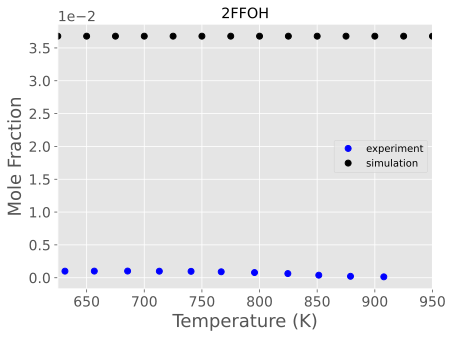

exp: [0.004962406110140846, 0.005323308175573442, 0.00491729350254192, 0.004421052409671362, 0.0048721808949429915, 0.00473684186750503, 0.004466166221911469, 0.0048270682873440655, 0.004105262951837693, 0.0038345873062441338, 0.003293233605774649]
O2(2) [0.20235467255062298, 0.20235467254673647, 0.20235467253821243, 0.20235467252045516, 0.20235467248499403, 0.20235467241564298, 0.2023546722748896, 0.20235467194165965, 0.20235467093108134, 0.20235466728686496, 0.2023546539746706, 0.2023546102208423, 0.20235448888457933, 0.20235420362404888]


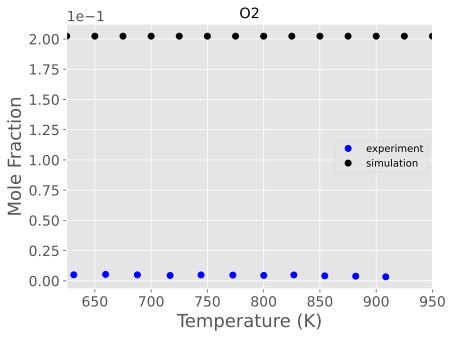

exp: [9.132414835487043e-05, 8.767109658127506e-05, 8.401823989722674e-05, 8.0365188123631e-05, 9.497700503891878e-05, 0.00011324187372780264, 0.00017168933647850217, 0.0002009131653986251, 0.00035799088005138645, 0.0005625570972236076, 0.0007561643541645889]
H2(3) [1.4446908716796601e-18, 4.645305725964745e-18, 1.390764831934e-17, 3.9936595890480764e-17, 1.1705482914144724e-16, 3.9070594903785666e-16, 1.65579660436777e-15, 9.01406214767775e-15, 5.922300229186584e-14, 4.464014543791675e-13, 3.663305116724947e-12, 2.94783055389221e-11, 2.0479132072863095e-10, 1.1431519860064102e-09]


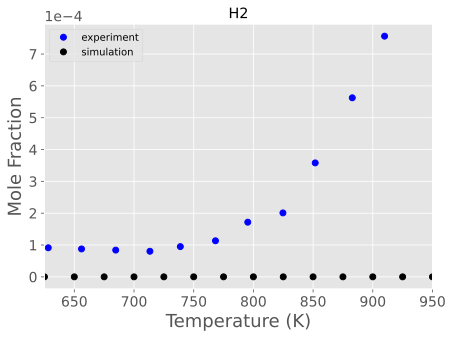

exp: [0.0001943320923521765, 0.0002186232795697348, 0.00020242901061293478, 0.0001943320923521765, 0.00027530343713617997, 0.0002834007878322218, 0.00035627521435546776, 0.0003724694833122678, 0.000663967621840533, 0.0007854252876694649, 0.0008502023634966677]
H2O(4) [9.914807733342225e-16, 3.5398443302594808e-15, 1.208262434313856e-14, 4.184969248989707e-14, 1.6278538655324753e-13, 7.677864689511666e-13, 4.187405155553524e-12, 2.355294809086206e-11, 1.2615813405804213e-10, 6.202995405770663e-10, 2.741593397850822e-09, 1.0615567201395038e-08, 3.5036863309447775e-08, 9.864792503205573e-08]


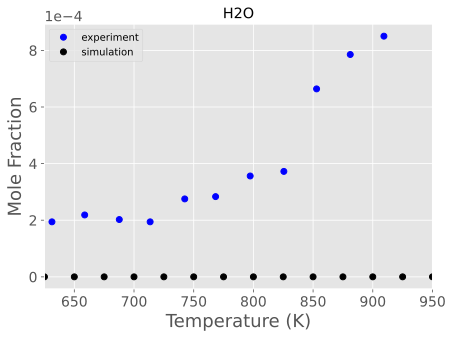

exp: [0.00031343283582089615, 0.0002985070072003272, 0.00031343283582089615, 0.00031343283582089615, 0.00031343283582089615, 0.00034328312660331306, 0.00043283536540928357, 0.0007910443206331618, 0.0016865667086928633, 0.0021492537313432835, 0.002611940070764342]
CO(5) [3.4850290053702e-18, 1.8276756355709903e-17, 8.86457384538053e-17, 4.399760176176881e-16, 2.7731495767138072e-15, 2.5555792166624703e-14, 2.853020526491943e-13, 3.0787793941226164e-12, 2.9086361859483408e-11, 2.3216992566124902e-10, 1.5351362716149784e-09, 8.21785505104145e-09, 3.4911059819855183e-08, 1.1919128151043714e-07]


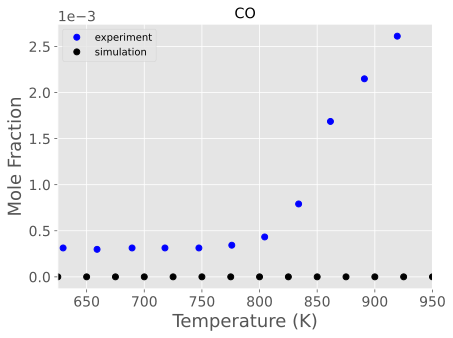

exp: [0.00013755459431841316, 0.00013100417564453263, 0.00011790393798721096, 0.0001244540568158718, 0.000111353519313331, 0.000144104713147074, 0.00015065483197573482, 0.00019650656331201863, 0.00019650656331201863, 0.00021615721964322028, 0.0003799125891214954]
CO2(6) [1.3928142349670026e-18, 3.6310905711983066e-17, 6.725133884427382e-16, 9.37688092083313e-15, 1.0314895815469698e-13, 9.26491029342304e-13, 6.968155754392084e-12, 4.4707796938278595e-11, 2.4796513401293014e-10, 1.1971656921769197e-09, 5.012930795229424e-09, 1.7849464133459777e-08, 5.264486803326023e-08, 1.285524065774353e-07]


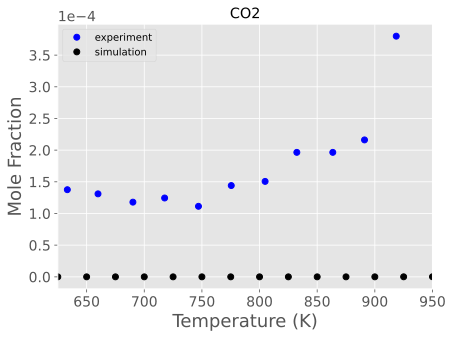

exp: [2.0388348004361455e-05, 2.135925134756938e-05, 2.0388348004361455e-05, 2.135925134756938e-05, 2.135925134756938e-05, 2.2330065804633902e-05, 2.427187249104975e-05, 3.2038832578282454e-05, 5.6310705069332205e-05, 0.0001310679514566105, 0.00015825244509114046]
ethylene(8) [1.5687767892799239e-21, 2.1467820971652538e-20, 2.432800698110313e-19, 2.5154520738818452e-18, 2.6809642655965278e-17, 3.2197109127106814e-16, 4.189187720057986e-15, 5.295815177200475e-14, 6.024187808838666e-13, 5.945752416905052e-12, 4.9744557123261364e-11, 3.423378159870914e-10, 1.875731274394343e-09, 8.149396680629753e-09]


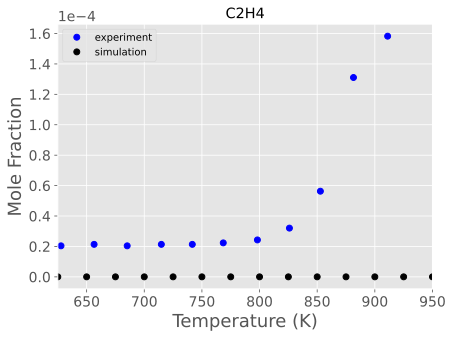

In [15]:
print(species_mol_frac_dict)
for specie in exp_data_dict.keys():
    if specie in labels_dict:
        plt.figure()
        ###EXP###:
        #get experimental T list:
        T_tuple_from_dict_exp_data = list(exp_data_dict[specie].keys())[0]
        T_list_exp = list(T_tuple_from_dict_exp_data)
        #exp mol frac were given in 10^-4, here we convert that
        mol_frac_list = exp_data_dict[specie][T_tuple_from_dict_exp_data]
        mol_frac_list = [x * (10**(-4)) for x in mol_frac_list]
        print("exp:" ,mol_frac_list)
        plt.plot(T_list_exp, mol_frac_list,"bo",label = "experiment")

        ###SIM###:
        sim_specie_label = labels_dict[specie]
        print(sim_specie_label, species_mol_frac_dict[sim_specie_label])
        plt.plot(T_list, species_mol_frac_dict[sim_specie_label], "ko", label = "simulation")
        plt.xlabel("Temperature (K)")
        plt.ylabel("Mole Fraction")
        plt.title(specie)
        plt.xlim([625, 950])
        plt.legend(loc="best")
        plt.tight_layout()
        plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        plt.savefig("files/"+"JSR_"+specie+".jpg", dpi=300, format='jpg')
        plt.show()